In [2]:
from datetime import datetime
import dask.array as da
import os
import time
import h5py
import numpy as np
import xarray as xr
import downscale as down

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [3]:
data_dir = os.path.join('..','output','pixel_stats','ncres_cluster_30580.nc')
DATA = xr.open_dataset(data_dir)

lon = DATA['lon']
lat = DATA['lat']
lon2d, lat2d = np.meshgrid(lon, lat)

DATA

<xarray.Dataset> Size: 43MB
Dimensions:              (lon: 280, lat: 112, years: 20, TR: 4)
Coordinates:
  * lon                  (lon) float32 1kB -129.9 -129.6 ... -60.38 -60.12
  * lat                  (lat) float32 448B 22.12 22.38 22.62 ... 49.62 49.88
  * years                (years) int32 80B 0 1 2 3 4 5 6 ... 14 15 16 17 18 19
  * TR                   (TR) int32 16B 10 20 50 100
Data variables: (12/47)
    CYd                  (lon, lat, years) float64 5MB ...
    WYs                  (lon, lat, years) float64 5MB ...
    WYd                  (lon, lat, years) float64 5MB ...
    NYd                  (lon, lat, years) float64 5MB ...
    CYs                  (lon, lat, years) float64 5MB ...
    NYs                  (lon, lat, years) float64 5MB ...
    ...                   ...
    clat                 (lon, lat) float32 125kB ...
    clon                 (lon, lat) float32 125kB ...
    alp_s                (lon, lat) float64 251kB ...
    nyears_gauge         (lon, lat) float64 251kB ...
    alp_g                (lon, lat) float64 251kB ...
    enough_gauges_bb     (lon, lat) bool 31kB ...

In [4]:
SCALE = np.nanmean(DATA['CYd'],axis=2)
DIMENSION = np.nanmean(DATA['NYd'],axis=2)
SHAPE = np.where(np.nanmean(DATA['WYd'],axis=2)<2000, np.nanmean(DATA['WYd'],axis=2), np.nan)

/tmp/ipykernel_15622/4093004072.py:1: RuntimeWarning: Mean of empty slice
  SCALE = np.nanmean(DATA['CYd'],axis=2)
/tmp/ipykernel_15622/4093004072.py:2: RuntimeWarning: Mean of empty slice
  DIMENSION = np.nanmean(DATA['NYd'],axis=2)
/tmp/ipykernel_15622/4093004072.py:3: RuntimeWarning: Mean of empty slice
  SHAPE = np.where(np.nanmean(DATA['WYd'],axis=2)<2000, np.nanmean(DATA['WYd'],axis=2), np.nan)


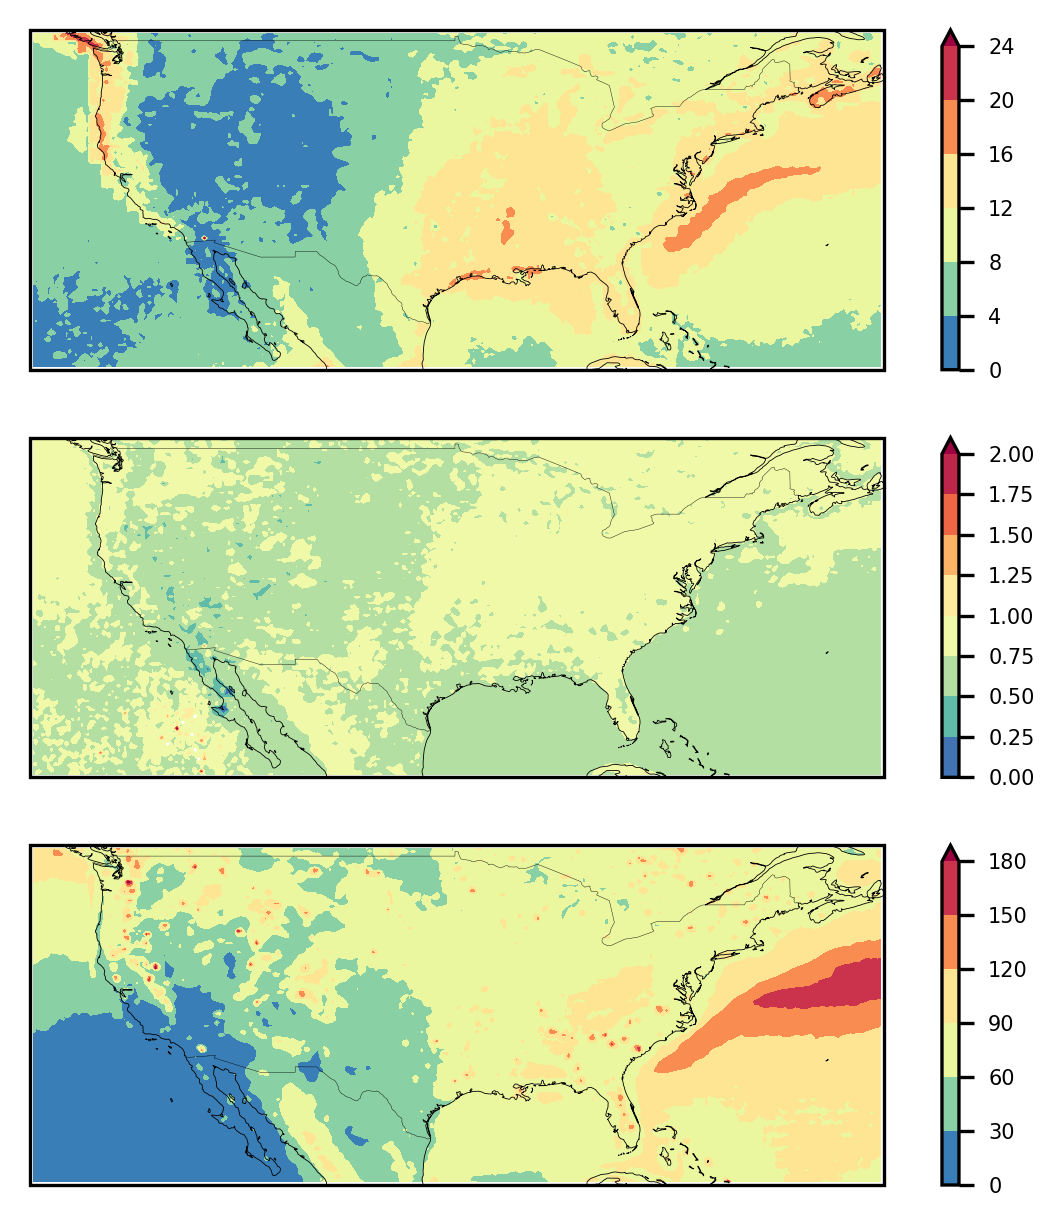

In [5]:
levels = None
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(5,5),dpi=300)
gs = gridspec.GridSpec(3,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

a1 = ax1.contourf(lon2d, lat2d, SCALE.T, cmap=cmap, levels=levels, extend='max')
cbar = plt.colorbar(a1, fraction = 0.018)
cbar.ax.tick_params(labelsize=5)

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

a1 = ax1.contourf(lon2d, lat2d, SHAPE.T, cmap=cmap, levels=levels, extend='max')
cbar = plt.colorbar(a1, fraction = 0.018)
cbar.ax.tick_params(labelsize=5)

# ============================================================================================================================
ax1 = plt.subplot(gs[2, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

a1 = ax1.contourf(lon2d, lat2d, DIMENSION.T, cmap=cmap, levels=levels, extend='max')
cbar = plt.colorbar(a1, fraction = 0.018)
cbar.ax.tick_params(labelsize=5)

In [6]:
data_dir = os.path.join('..','output','pixel_stats','tmpa_mev_global_quants.hdf5')
DATA = xr.open_dataset(data_dir, engine="h5netcdf", phony_dims='sort')
DATA

<xarray.Dataset> Size: 1MB
Dimensions:  (phony_dim_0: 4, phony_dim_1: 112, phony_dim_2: 280)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2
Data variables:
    Tr       (phony_dim_0) int32 16B ...
    lat      (phony_dim_1) float32 448B ...
    lon      (phony_dim_2) float32 1kB ...
    qgev     (phony_dim_2, phony_dim_1, phony_dim_0) float32 502kB ...
    qmev     (phony_dim_2, phony_dim_1, phony_dim_0) float32 502kB ...
    thresh   float32 4B ...

In [7]:
lat[1].data - lat[0].data

0.25

Text(0.0, 1.0, 'Quantile 100 for GEV')

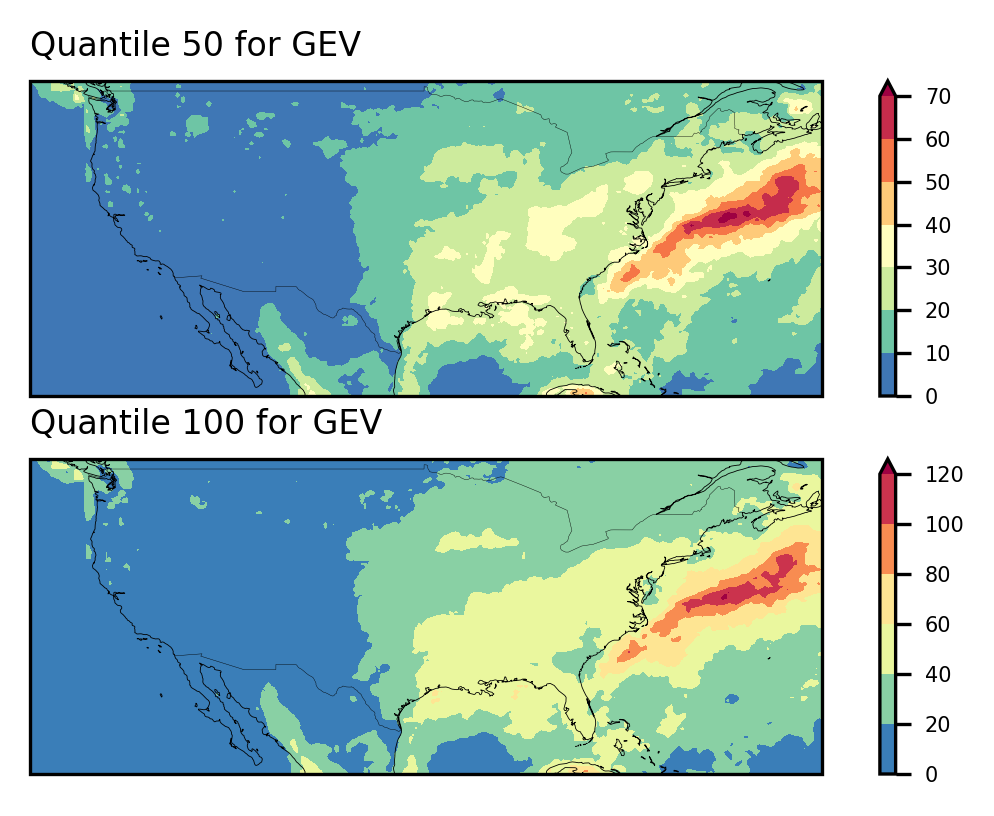

In [8]:
tt = 2
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(5,3),dpi=300)
gs = gridspec.GridSpec(2,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

a1 = ax1.contourf(lon2d, lat2d, DATA['qgev'][:,:,tt].T, cmap=cmap, levels=levels, extend='max')
cbar = plt.colorbar(a1, fraction = 0.018)
cbar.ax.tick_params(labelsize=5)
ax1.set_title(f'Quantile {DATA['Tr'].data[tt]} for GEV', loc='left', fontsize=8)

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

a1 = ax1.contourf(lon2d, lat2d, DATA['qgev'][:,:,tt+1].T, cmap=cmap, levels=levels, extend='max')
cbar = plt.colorbar(a1, fraction = 0.018)
cbar.ax.tick_params(labelsize=5)
ax1.set_title(f'Quantile {DATA['Tr'].data[tt+1]} for GEV', loc='left', fontsize=8)

In [10]:
data_dir = os.path.join('..','output','pixel_stats','predicted_error_maps.nc')
DATA = xr.open_dataset(data_dir)

    # lon = DATA['lon']
    # lat = DATA['lat']
    # lon2d, lat2d = np.meshgrid(lon, lat)

DATA

<xarray.Dataset> Size: 1MB
Dimensions:  (x: 280, y: 112)
Coordinates:
    lon      (x) float32 1kB ...
    lat      (y) float32 448B ...
Dimensions without coordinates: x, y
Data variables:
    etaC     (x, y) float64 251kB ...
    etaW     (x, y) float64 251kB ...
    etaN     (x, y) float64 251kB ...
    etaQ     (x, y) float64 251kB ...

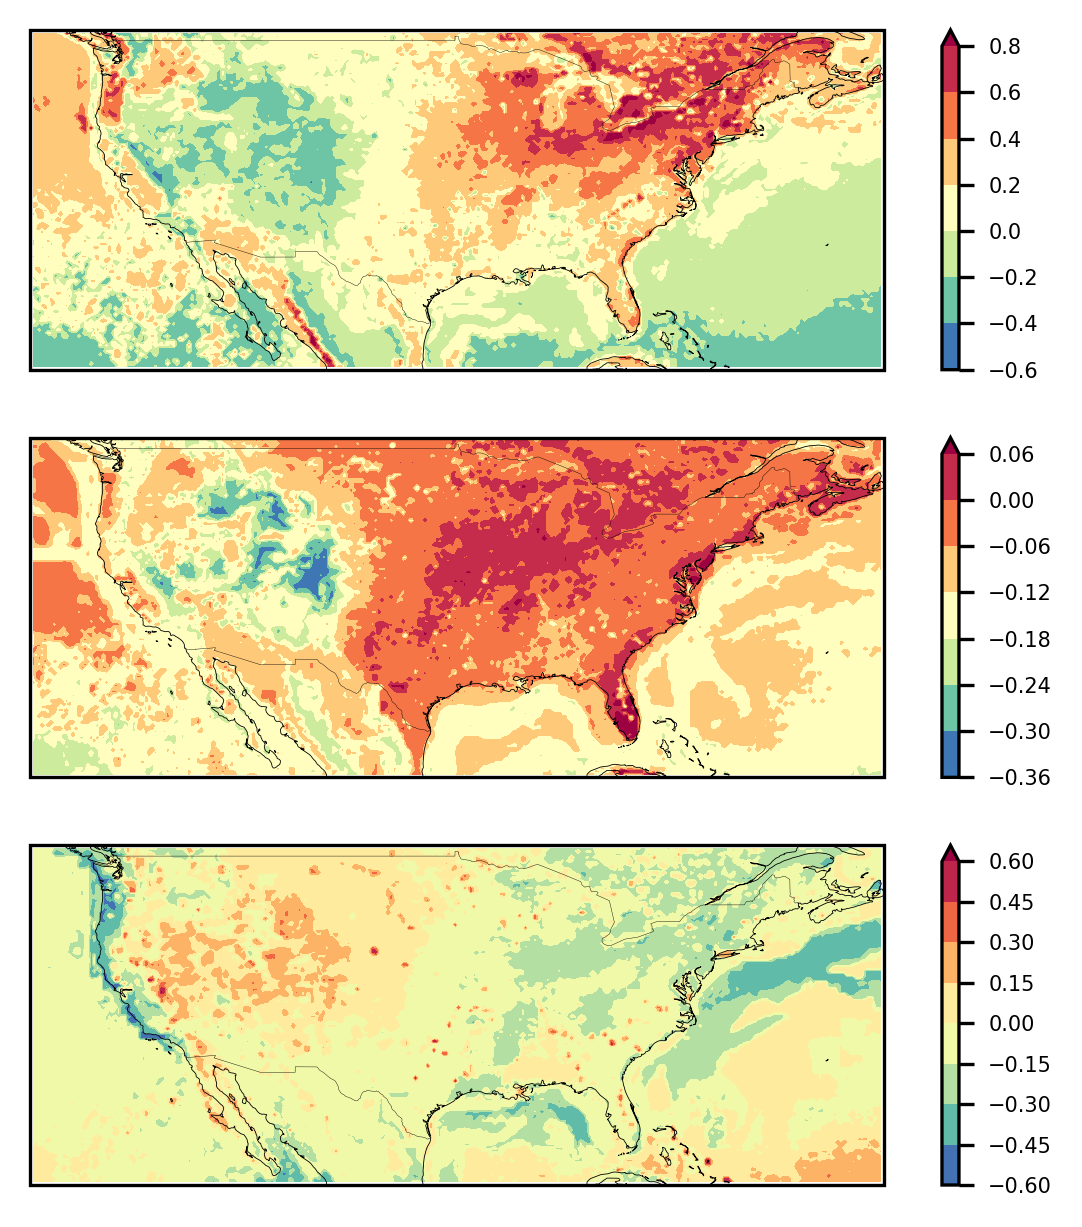

In [19]:
levels = None
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(5,5),dpi=300)
gs = gridspec.GridSpec(3,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

a1 = ax1.contourf(lon2d, lat2d, DATA['etaC'].T, cmap=cmap, levels=levels, extend='max')
cbar = plt.colorbar(a1, fraction = 0.018)
cbar.ax.tick_params(labelsize=5)

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

a1 = ax1.contourf(lon2d, lat2d, DATA['etaW'].T, cmap=cmap, levels=levels, extend='max')
cbar = plt.colorbar(a1, fraction = 0.018)
cbar.ax.tick_params(labelsize=5)

# ============================================================================================================================
ax1 = plt.subplot(gs[2, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

a1 = ax1.contourf(lon2d, lat2d, DATA['etaN'].T, cmap=cmap, levels=levels, extend='max')
cbar = plt.colorbar(a1, fraction = 0.018)
cbar.ax.tick_params(labelsize=5)